<a href="https://colab.research.google.com/github/Mnikito/4016/blob/main/Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from torchvision import models

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [26]:
alexnet = models.AlexNet()

In [27]:
resnet = models.resnet101(pretrained=True)

In [28]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [29]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In [30]:
from PIL import Image
img = Image.open("/content/drive/MyDrive/4106/Lizard.jpeg")

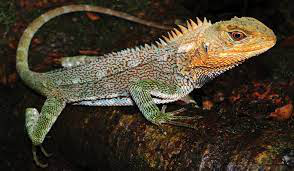

In [31]:
img

In [32]:
img_t = preprocess(img)

In [33]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [34]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [35]:
out = resnet(batch_t)
out

tensor([[ 1.8234e+00,  8.4053e-01, -2.1601e+00,  9.4423e-02, -1.8722e+00,
          3.9012e+00, -6.2380e-01,  1.0234e-01,  5.2184e-01, -1.2908e+00,
          2.8053e+00, -4.0958e-01,  6.4429e-03, -9.2352e-01,  7.4925e-01,
         -8.2987e-01, -2.1758e+00, -5.8484e-01, -2.1521e+00, -1.0861e+00,
         -1.6172e-01, -1.0473e+00, -9.4475e-01, -2.4119e-01, -8.0920e-01,
          3.8969e+00,  7.9580e+00,  5.4466e+00,  2.3848e+00,  4.7341e+00,
          2.3166e+00,  2.8028e+00,  6.7277e+00,  1.2956e+00,  2.9532e+00,
          3.0915e+00,  3.4070e+00,  1.3123e+00,  1.2024e+01,  1.1079e+01,
          8.2755e+00,  1.1194e+01,  1.3506e+01,  1.3311e+01,  8.7440e+00,
          4.4472e+00,  9.1190e+00,  1.2500e+01,  5.2045e+00,  5.9823e+00,
          3.5669e+00,  4.9722e+00,  1.0667e+00, -2.7777e-01,  1.2763e+00,
         -6.7881e-01, -8.8971e-02, -9.3787e-01,  1.0312e-01,  3.3906e+00,
          3.6277e+00,  2.1780e-01,  2.6092e+00,  2.7584e+00,  3.1663e+00,
          2.4928e+00,  6.3225e+00,  8.

In [36]:
with open('/content/drive/MyDrive/4106/dlwpt-code/data/p1ch2/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [37]:
_, index = torch.max(out, 1)

In [38]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('agama', 37.84983825683594)

In [39]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('agama', 37.84983825683594),
 ('frilled lizard, Chlamydosaurus kingi', 31.123769760131836),
 ('African chameleon, Chamaeleo chamaeleon', 13.838709831237793),
 ('banded gecko', 8.600578308105469),
 ('whiptail, whiptail lizard', 3.750304937362671)]